In [1]:
import os
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
import dlib
import cv2
import numpy as np

## Klassenverteilung

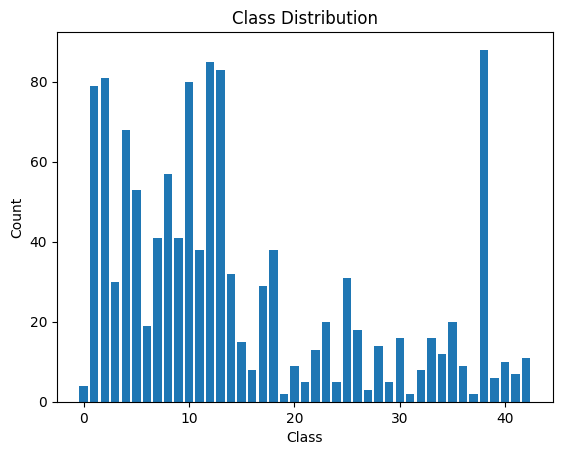

In [2]:
dataset_path = os.path.join(os.getcwd(), "..", "localization", "FullIJCNN2013")
resources_path = os.path.join(os.getcwd(), "..", "localization", "resources")

ground_truths = defaultdict(lambda: [])
with open(os.path.join(dataset_path, "gt.txt")) as f:
    lines = f.readlines()
    for line in lines:
        name, x1, y1, x2, y2, label = line.split(";")
        ground_truths[name].append((int(x1), int(y1), int(x2), int(y2), int(label)))

class_counts = Counter([label for box in ground_truths.values() for _, _, _, _, label in box])
plt.bar(class_counts.keys(), class_counts.values())
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

Wie hier zu sehen, besteht eine große Ungleichverteilung der Daten. Dies muss also mindestens bei der Auswahl der Trainingsdaten berücksichtigt werden und im speziellen Fall von HOG+SVM ergibt es zudem Sinn, die Daten noch einmal nach Formen zu trennen.

## Edge Filters

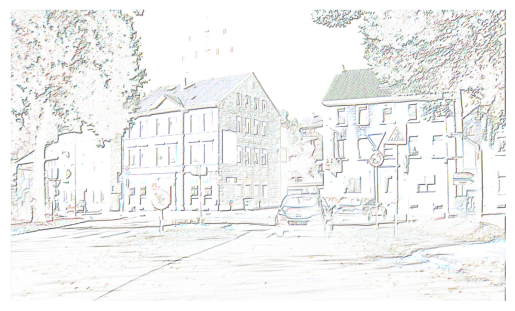

In [3]:
kernels = [
    np.array([[-1, 0, 1]]),  # vertical edges
    np.array([[-1], [0], [1]]),  # horizontal edges
]

image_path = os.path.join(os.getcwd(), "..", "localization", "FullIJCNN2013", "00001.ppm")
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

results = [cv2.filter2D(image, -1, kernel) for kernel in kernels]
mean_result = np.invert(np.clip(sum(results), 0, 255).astype(np.uint8))

plt.imshow(mean_result)
plt.axis("off")
plt.show()